<a href="https://colab.research.google.com/github/yuktash/Hotel-Booking-Analysis/blob/main/hotel_booking_analysis_capstone_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **<b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Hotel Booking** 

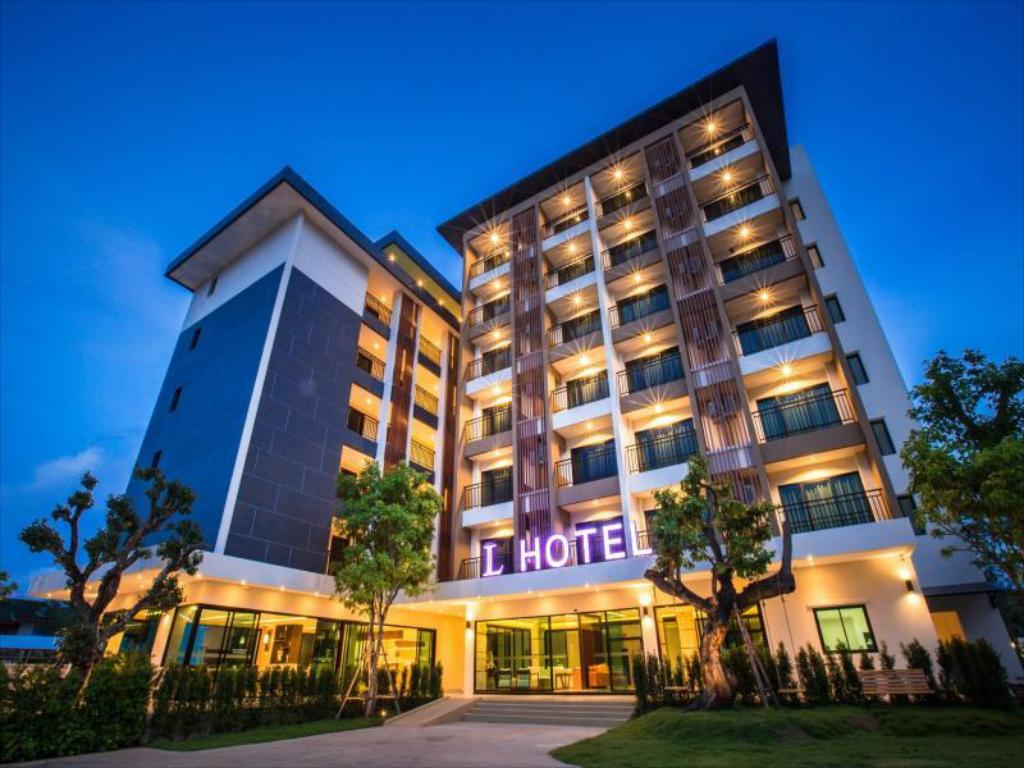

## **Data Description**:

**hotel** : Hotel consist of  Resort Hotel or City Hotel

**is_canceled** : Value indicating if the booking was canceled (1) or not canceled (0)

**lead_time** : :The number of days duration between the Booking and actual arrival

**arrival_date_year** : arriving Year date

**arrival_date_month** : arriving Month date

**arrival_date_week_number** : Week number in year for arrival date

**arrival_date_day_of_month** : Day of arrival date

**stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) 

**stays_in_week_nights** : Number of week nights (Monday to Friday) 

**adults** : Number of adults

**children** : Number of children

**babies** : Number of babies

**meal** : Type of meal preferred. 

Undefined/SC – no meal package
  **BB** – Bed & Breakfast
  **HB** – Half board (breakfast and one other meal – usually dinner)
  **FB** – Full board (breakfast, lunch and dinner)

**country** : Country of origin. Categories are represented in the ISO 3155–3:2013 format



**market_segment** : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**distribution_channel** : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**is_repeated_guest** : Value indicating if the booking name was from a repeated guest (1) or not (0)

**previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type** : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**assigned_room_type** : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

**booking_changes** : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type** : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

No Deposit – no deposit was made
Non Refund - a deposit was made in the value of the total stay cost
Refundable – a deposit was made with a value under the total cost of stay.
**agent** : ID of the travel agency that made the booking

**company** : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

**days_in_waiting_list** : Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type** : Type of booking, assuming one of four categories:

1.  Contract - when the booking has an allotment or other type of contract associated to it

2. Group – when the booking is associated to a group

3. Transient – when the booking is not part of a group or contract, and is not associated to other transient booking

4. Transient-party – when the booking is transient, but is associated to at least other transient booking




**adr** : ADR The average daily rate (ADR) is a performance indicator used in the hospitality sector to measure the strength of revenues generated. It is measured as the total revenues generated by all the occupied rooms in a hotel or lodge divided by the total number of occupied rooms over a given time period. It is a simple average that shows the revenues generated per occupied room.The average daily rate includes only the occupied rooms and not the total available stock.

**required_car_parking_spaces** : Number of car parking spaces required by the customer

**total_of_special_requests** : Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status** : Reservation last status, assuming one of three categories:

**Check-Out** – customer has checked in but already departed
No-Show – customer did not check-in and did inform the hotel of the reason why
**reservation_status_date** : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [2]:
from seaborn.rcmod import set_style
# setting parameters
plt.rcParams["axes.titlesize"] = 17
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["legend.title_fontsize"] = 12
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams["font.weight"] = "bold"

**Mount drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load Data**

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Data/Hotel Bookings.csv')

In [5]:
# creating copy so as to not disturb original dataset.
df=data.copy()


## **Data Inspection**

In [6]:
# row & columns of dataset
df.shape

(119390, 32)

In [7]:
''' we have 32 columns hence setting maximum columns to be displayed as 36
      considering 4 columns extra if we add any column later'''

pd.set_option("display.max_columns", 36)

-------Column of Dataset-------

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

------Top 3 Row------

In [9]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


--------Bottom 3 Row------

In [10]:
# checking last 3 rows
df.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


--------sample rows------

In [11]:
df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
9163,Resort Hotel,1,186,2016,October,45,30,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,49.17,0,0,Canceled,2016-06-09
103452,City Hotel,0,58,2016,December,52,24,0,1,1,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,7.0,NaN,0,Transient,54.05,0,1,Check-Out,2016-12-25
86883,City Hotel,0,134,2016,April,15,9,1,1,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,90.00,0,1,Check-Out,2016-04-11


In [12]:
# Using Transpose to make visible all column
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370,0.483,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011,106.863,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.157,0.707,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165,13.605,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798,8.781,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.928,0.999,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500,1.908,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856,0.579,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.104,0.399,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.008,0.097,0.00,0.00,0.000,0.0,10.0


In [13]:
# statistical information about Object variables in data.
df.describe(include='O').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [14]:
# checking null/missing values and datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## **Check & Handle Null values**

In [15]:
# Finding Null Value & it's percentage
null_val = df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().mean())*100
Missing_data = pd.concat([null_val , percentage],axis=1 , keys = ['null_val','Percentage'])
Missing_data.head()

,null_val,Percentage
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
reserved_room_type,0,0.000000


Text(0.5, 1.0, 'Missing values display')

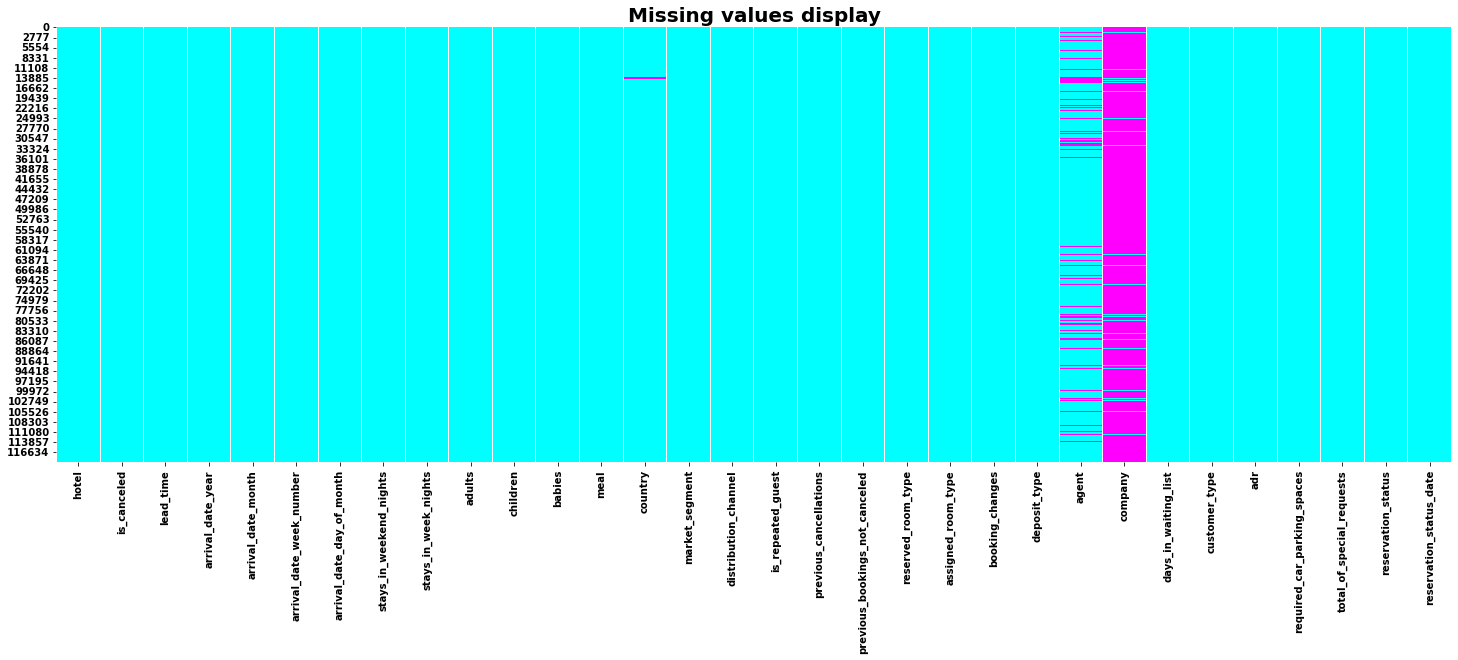

In [16]:
# Heatmap to see null values in dataset

plt.figure(figsize=(25,8))
sns.heatmap(df.isnull(),cbar=False,cmap='cool')
plt.title('Missing values display',fontsize=20)

#sky blue --> Non null values 
# Magenta --> null values

In [17]:
# Dropping company column as it contains 94% of null values.
df.drop(['company'],axis=1,inplace=True)

In [18]:
# children ,agent columns consists of less null values hence can be replaced by 0 
# unavailable country data can be replaced by 'others'

df['children'].fillna(0,inplace=True)
df['country'].fillna('others',inplace=True)
df['agent'].fillna(0,inplace=True)

In [19]:
# children ,agent cannot be present in float datatype hence converted to integer 

df['children']=df['children'].astype(int)
df['agent']=df['agent'].astype(int)

In [20]:
# --------adding new columns 
# since column 'babies' is added in total people & logically only babies can not visit hotel hence column is removed 

df['total_people'] = df['adults']+df['babies']+df['children']
df.drop(['babies'],axis=1,inplace=True)

#---------adding new column Total stay
df['total_stay']= df['stays_in_week_nights']+df['stays_in_weekend_nights']

# Updated Columns

In [21]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_people',
       'total_stay'],
      dtype='object')

In [22]:
len(df.columns)

32

In [23]:
# cross-check if all null values are removed from dataframe.
df.isnull().sum().sort_values(ascending=False).head(6)

hotel                        0
is_canceled                  0
total_people                 0
reservation_status_date      0
reservation_status           0
total_of_special_requests    0
dtype: int64

###**Handling Duplicate values**

In [24]:
# Finding the duplicate values
df.duplicated().value_counts()

False    87389
True     32001
dtype: int64

In [25]:
# Droping the dulpicate values
df.drop_duplicates(inplace=True)

In [26]:
# After droping duplicates value finding any duplicate value present
df.duplicated().value_counts()

False    87389
dtype: int64

In [27]:
# Final Rows & Columns after Dropping Duplicates
df.shape

(87389, 32)

*   **Company column contains 94% Missing values , hence column is dropped**

*  **agent, children column has less then 15% missing values hence replced by 0 & replaced by 'others' for country column.**


*  **after removing Duplicates data has**:
1.   Rows -->87389
2.   columns--> 33

# **Outliers Detection**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

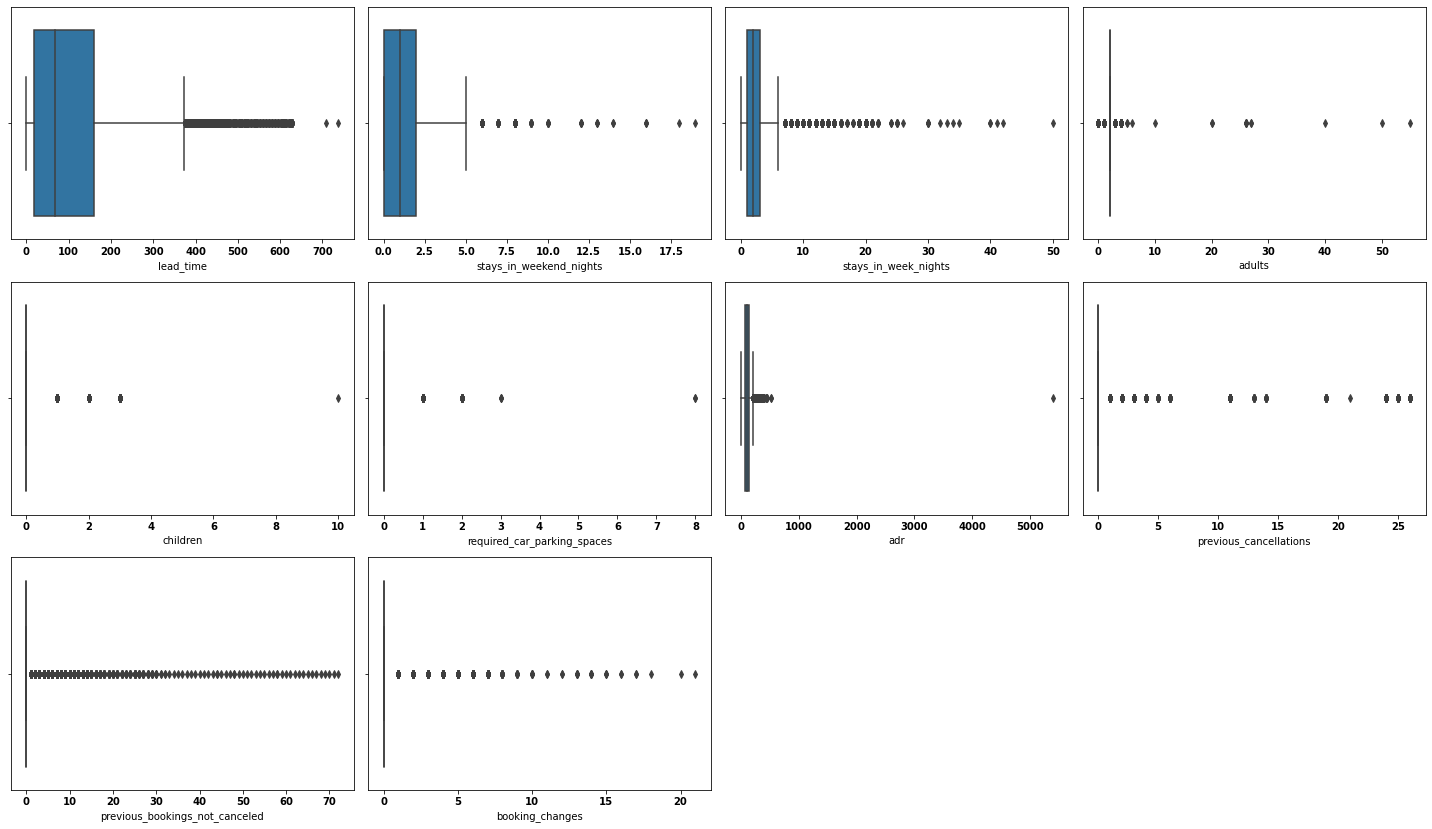

In [28]:
clms = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children','required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))
for column in clms:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(data[column])
  plt.tight_layout()

# **Exploratory data analysis**
(EDA)

In [29]:
# dataframe of numrical variables
num_df = df[['is_canceled','lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','is_repeated_guest','required_car_parking_spaces','total_of_special_requests','total_people']]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


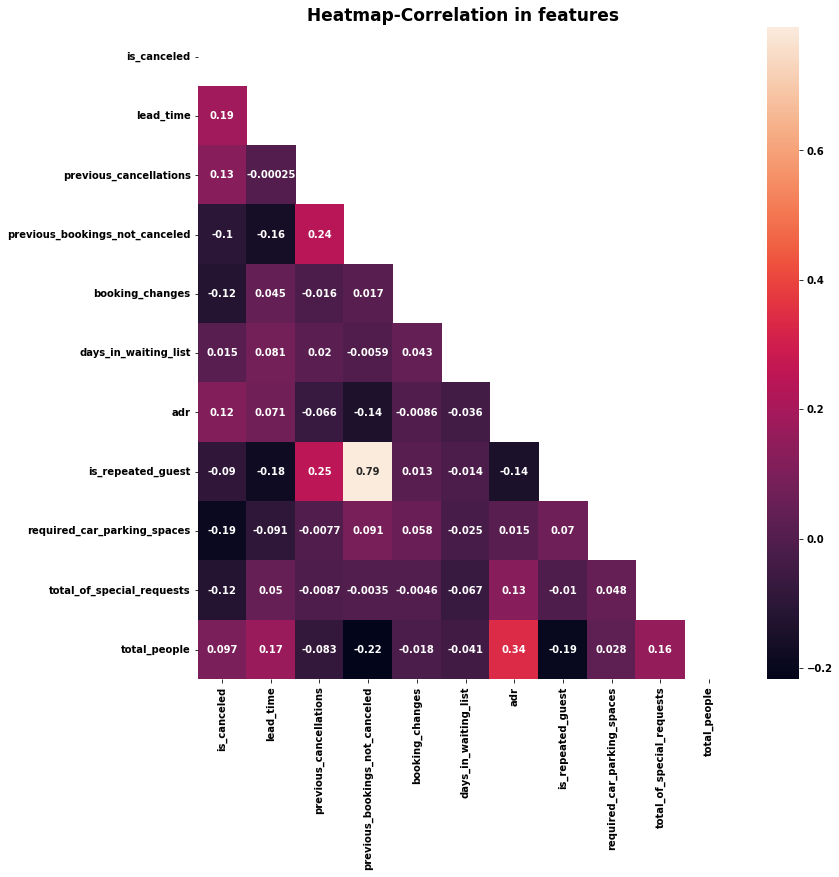

In [30]:
# Heatmap to find correlation between features
plt.figure(figsize=(12,12))
corr=num_df.corr(method='kendall')
matrix=np.triu(corr)
sns.heatmap(corr,annot=True,mask=matrix)
plt.title('Heatmap-Correlation in features ')
plt.show()

# **Most preferred Hotel Type**

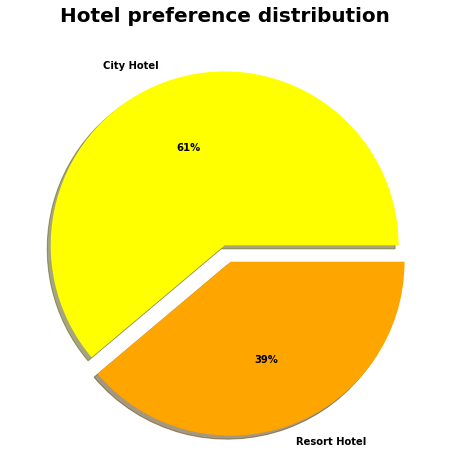

In [31]:
plt.rcParams['figure.figsize'] = 8,8
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
plt.pie(sizes , labels=labels ,colors=['yellow','orange'],autopct = '%.0f%%',explode = (0, 0.1),shadow=True)
plt.title('Hotel preference distribution',fontsize=20)
plt.show()

### **Sector from which most of the customers coming**

[]

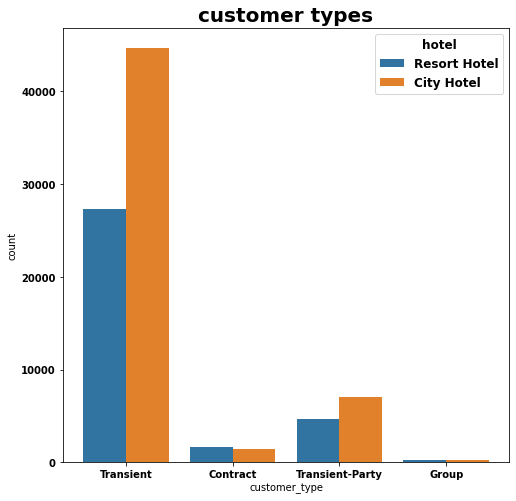

In [32]:
sns.countplot(data=df,x='customer_type',hue='hotel')
plt.title("customer types",fontsize=20)
plt.plot()
# Transient = when the booking is not part of a group or contract, and is not associated to other transient booking

# **Monthly arrival**

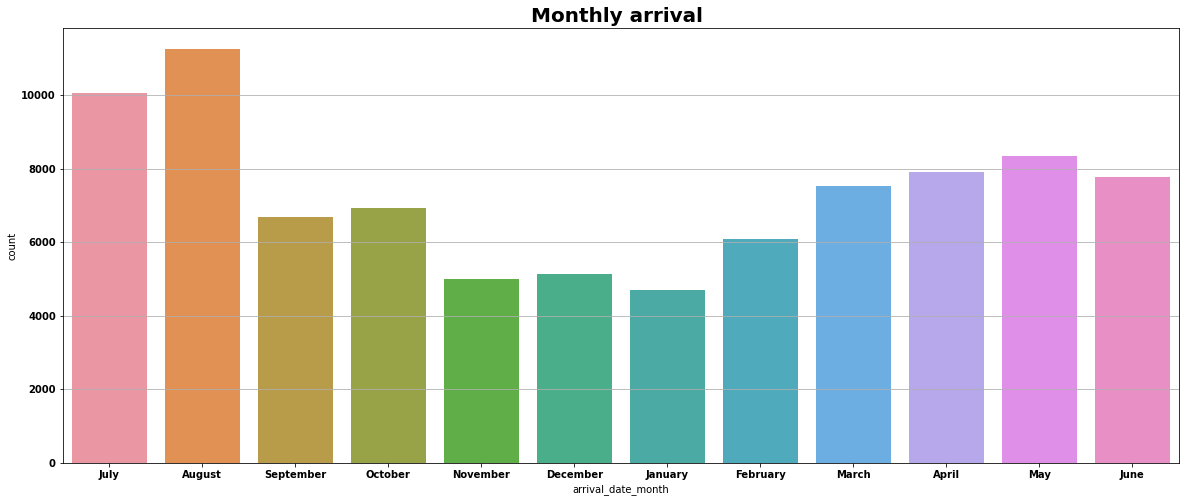

In [33]:
# Monthly arrival rate of customer

fig=plt.figure(figsize=(20,8)) 
sns.countplot(data=df,x='arrival_date_month')
plt.title('Monthly arrival ',fontsize=20)
plt.grid(axis='y')
plt.show()

----Observation----

1. Peak Season of Booking is August , July where maximum booking occurs.

2. Minimum Booking seen in January , November.

# **Yearly arrival**

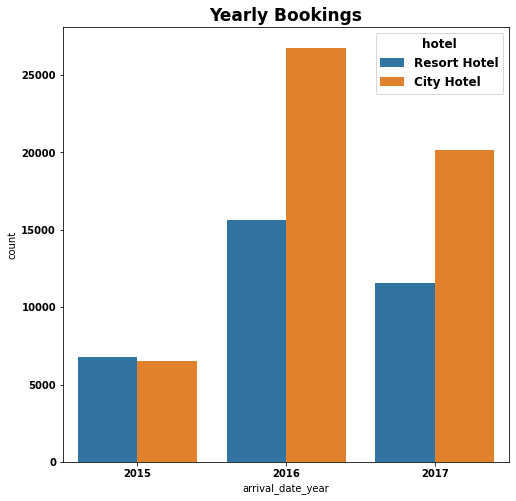

In [34]:
# Yearly arrival rate of customer
sns.countplot(data=df,hue='hotel',x='arrival_date_year')
plt.title('Yearly Bookings')
plt.show()

# **Best time of Year to Book Hotel.**

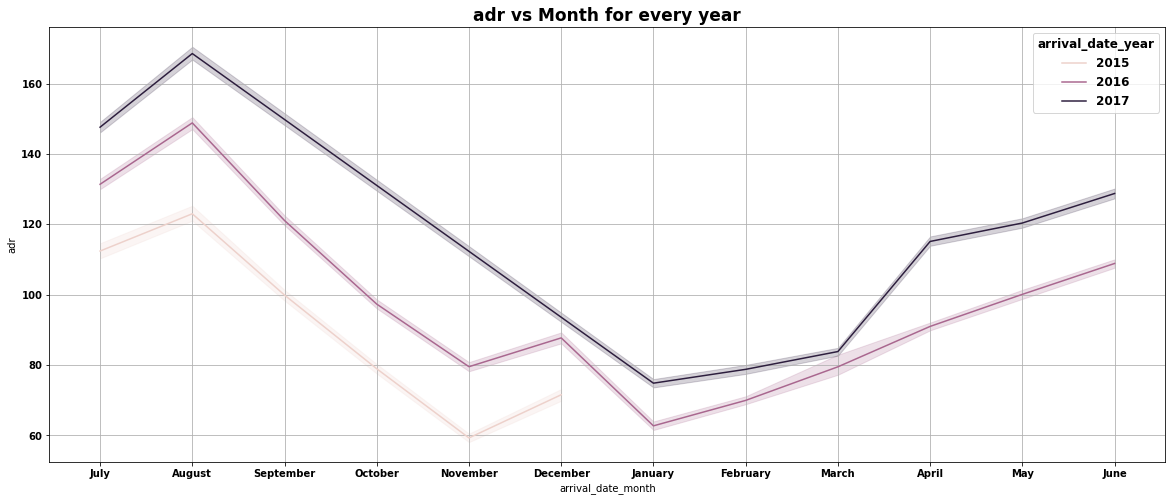

In [35]:
# ADR variation within month of continious 3 Year
# adr -> avg. daily rate

plt.figure(figsize=(20,8))
sns.lineplot(y='adr',x='arrival_date_month',hue= 'arrival_date_year',data=df)
plt.title('adr vs Month for every year')
plt.grid()
plt.show()

-------Observation------

1. price is Highest in August , july as we have seen these are peak months where demand of increases.(high rush --> high booking -->high adr)

2. adr is lowest in month of January , november hence this can be the best time to book hotels to get at best price.

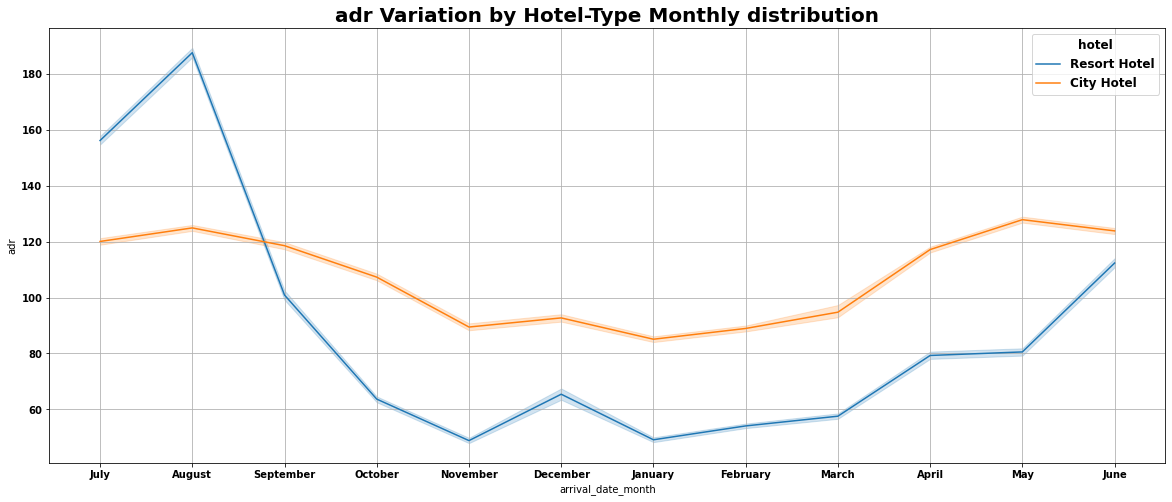

In [36]:
# Adr variation with months
plt.figure(figsize=(20,8))
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=df)
plt.title('adr Variation by Hotel-Type Monthly distribution',fontsize=20)
plt.grid()
plt.show()

------Observation-------

1. it is seen that avrage daily rate for Resort hotel is fluctuating where as for city hotel it is quite stable.

2. daily rate of resort hotel is higher then city hotel in month of july,august whereas it is lower in other months

3. to book **resort in summer months**(july,aug,sept) at **best price** , booking can be done in advance when adr is less (before june)

# **Optimal lengh of stay**

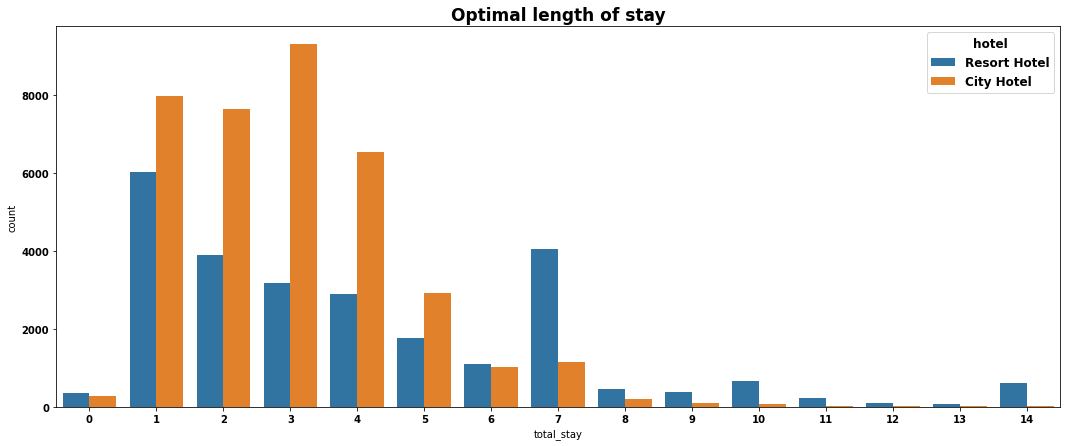

In [37]:
plt.figure(figsize=(18,7))
not_canceled = df[df['is_canceled'] == 0]
m = not_canceled[not_canceled['total_stay'] < 15]
sns.countplot(x = m['total_stay'], hue = m['hotel'])
plt.title('Optimal length of stay')
plt.show()

------Observation-------

1. usual stay length is about 4 days. 
2. Mostly for couple of days (less than week) city hotel is preferred over Resort Hotel
2. for longer stay (more than week) Resort hotel is preferred.

**1)cancellation with Deposit type**

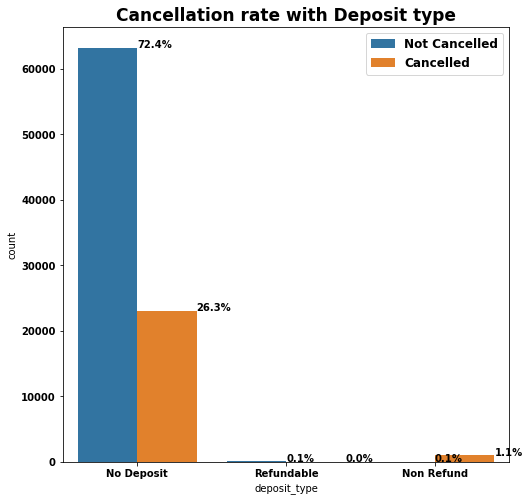

In [38]:
ax=sns.countplot(hue='is_canceled',x='deposit_type',data=df) 
plt.title('Cancellation rate with Deposit type')
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),fontsize=10)

l = plt.legend()
l.get_texts()[0].set_text('Not Cancelled')
l.get_texts()[1].set_text('Cancelled');

------Observation-------

booking canceled --> 
* 26% no deposit 
* 1.1% non refundable
* 0% in Refundable deposit type

No Deposit is highly preferred payment mode by customer but it comes with disadvantage for hotels as people with no deposte has highest chances of Booking cancellation

 **2) cancellation with Repeated Guest**

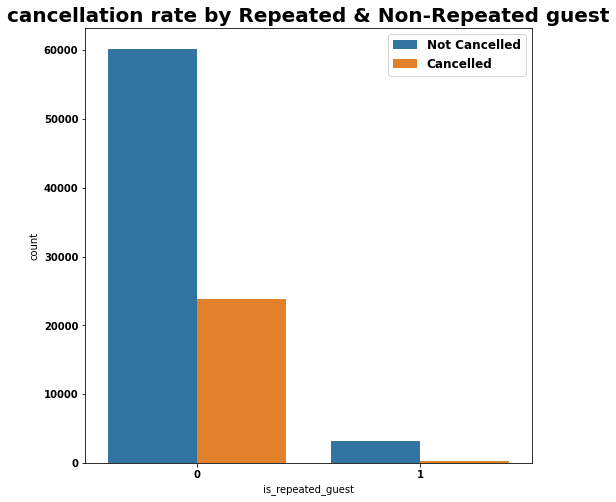

In [41]:
sns.countplot(x='is_repeated_guest',hue='is_canceled',data=df)
plt.title('cancellation rate by Repeated & Non-Repeated guest',fontsize=20)
y = plt.legend()
y.get_texts()[0].set_text('Not Cancelled')
y.get_texts()[1].set_text('Cancelled')
plt.show()

------Observation-------

 Repeated guests are not likely to cancel their booking.

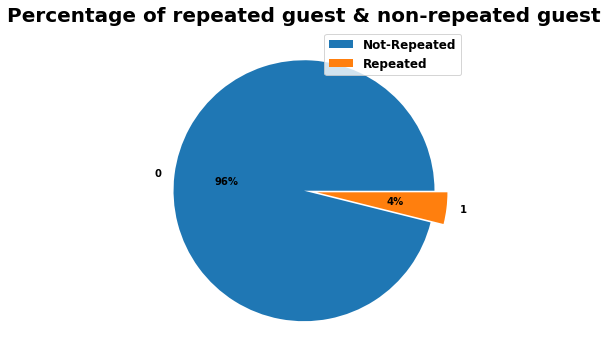

In [42]:
# Pie chart of Repeating guest & not-repeated guest

plt.rcParams['figure.figsize'] = 6,6
labels = df['is_repeated_guest'].value_counts().index.tolist()
sizes = df['is_repeated_guest'].value_counts().tolist()
plt.pie(sizes , labels=labels ,autopct = '%.0f%%',explode = (0, 0.1))

y = plt.legend()
y.get_texts()[0].set_text('Not-Repeated')
y.get_texts()[1].set_text('Repeated')

plt.title('Percentage of repeated guest & non-repeated guest',fontsize=20)
plt.show()

------Observation-------

* 4% of Repeated Guests.
* 96% of non repeated guest.

In [39]:
month_special_reqs=df.groupby(['arrival_date_month'])['total_of_special_requests'].sum().reset_index()
month_special_reqs

,arrival_date_month,total_of_special_requests
0,April,5173
1,August,9409
2,December,3756
3,February,3894
4,January,2985
5,July,7720
6,June,5345
7,March,4312
8,May,5557
9,November,3534


Text(0, 0.5, 'Special request count')

<Figure size 1800x576 with 0 Axes>

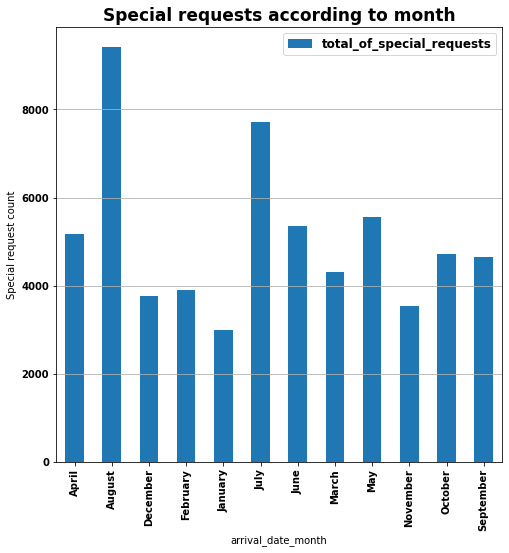

In [40]:
plt.figure(figsize=(25,8))
month_special_reqs.plot(kind='bar',x='arrival_date_month',y='total_of_special_requests')
plt.grid(axis='y')
plt.title('Special requests according to month')
plt.ylabel('Special request count')

special request seen in peak Months that is august & july

# **Market Capture**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


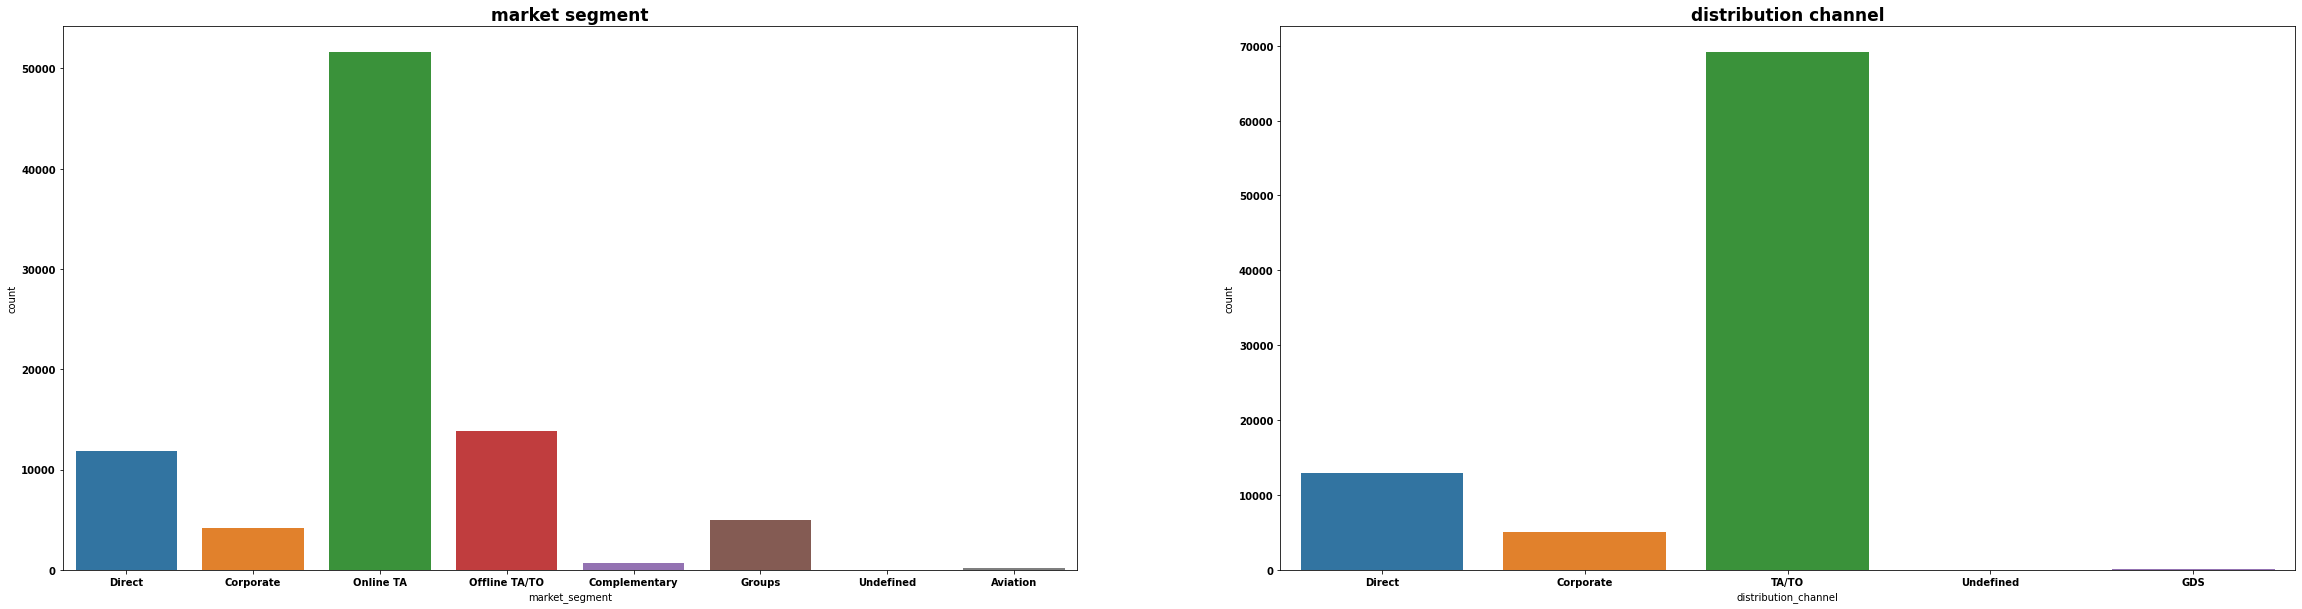

In [43]:
# who brings most guest in market segment
fig , (ax1,ax2)=plt.subplots(1,2,figsize=(40,10))
sns.countplot(df['market_segment'],ax=ax1)
ax1.title.set_text('market segment')

sns.countplot(data=df,x='distribution_channel',ax=ax2)
ax2.title.set_text('distribution channel')

# **Meal type**

Text(0.5, 1.0, 'Popular Meal type in Resort & City hotel')

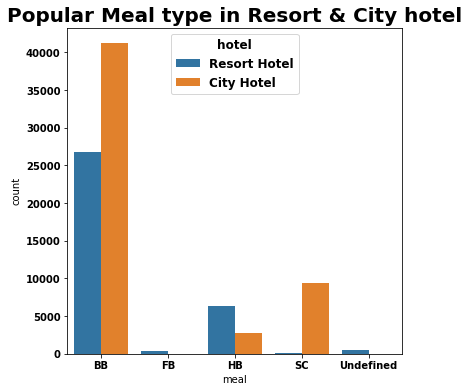

In [44]:
sns.countplot(data=df , x='meal',hue='hotel')
plt.title('Popular Meal type in Resort & City hotel',fontsize=20)

# Undefined/SC – no meal package
# BB – Bed & Breakfast
# HB – Half board (breakfast and one other meal – usually dinner)
# FB – Full board
